#Superconduct

Nuestro archivo train_conductivity.csv contiene 81 características extraídas de 21263 superconductores, en la última variable se encuentra "critical_temp", esta será la que intentaremos predecir.
Nuestro objetivo es crear y comparar diferentes modelos para predecir esta variable. Esta temperatura crítica es aquella a la que nuestros superconductores empiezan a deteriorarse.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

from tabulate import tabulate
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
import seaborn as sns

##1. Importación del Dataset y Limpieza de Datos

In [ ]:
df = pd.read_csv('C:\\Users\\Diego\\Downloads\\train_conductivity.csv', sep = ';').round(3)
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944,57.863,66.362,36.117,1.182,1.062,122.906,31.795,51.969,...,2.257,2.213,2.220,1.369,1.066,1,1.086,0.433,0.437,29.00
1,5,92.729,58.518,73.133,36.397,1.449,1.058,122.906,36.162,47.095,...,2.257,1.888,2.211,1.557,1.047,2,1.129,0.632,0.469,26.00
2,4,88.944,57.885,66.362,36.123,1.182,0.976,122.906,35.741,51.969,...,2.271,2.213,2.233,1.369,1.029,1,1.114,0.433,0.445,19.00
3,4,88.944,57.874,66.362,36.120,1.182,1.022,122.906,33.768,51.969,...,2.264,2.213,2.226,1.369,1.049,1,1.100,0.433,0.441,22.00
4,4,88.944,57.840,66.362,36.111,1.182,1.129,122.906,27.849,51.969,...,2.243,2.213,2.207,1.369,1.096,1,1.057,0.433,0.429,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.958,53.096,82.515,43.136,1.177,1.254,146.881,15.504,65.764,...,3.556,3.224,3.520,1.378,0.914,1,2.169,0.433,0.497,2.44
21259,5,92.267,49.021,64.813,32.868,1.323,1.572,188.384,7.353,69.233,...,2.048,2.169,2.039,1.594,1.337,1,0.905,0.400,0.213,122.10
21260,2,99.663,95.609,99.434,95.464,0.691,0.530,13.514,53.041,6.757,...,4.800,4.472,4.782,0.687,0.451,1,3.200,0.500,0.400,1.98
21261,2,99.663,97.096,99.434,96.901,0.691,0.641,13.514,31.115,6.757,...,4.690,4.472,4.666,0.687,0.578,1,2.210,0.500,0.462,1.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000,3.000,4.000,5.000,9.000
mean_atomic_mass,21263.0,87.557654,29.676485,6.941,72.458,84.923,100.404,208.980
wtd_mean_atomic_mass,21263.0,72.988307,33.490399,6.423,52.144,60.697,86.104,208.980
gmean_atomic_mass,21263.0,71.290647,31.030268,5.321,58.041,66.362,78.117,208.980
wtd_gmean_atomic_mass,21263.0,58.539913,36.651065,1.961,35.249,39.918,73.113,208.980
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000,1.000,2.000,3.000,6.000
wtd_range_Valence,21263.0,1.483003,0.978176,0.000,0.921,1.063,1.918,6.992
std_Valence,21263.0,0.839297,0.484687,0.000,0.452,0.800,1.200,3.000
wtd_std_Valence,21263.0,0.673966,0.455612,0.000,0.307,0.500,1.020,3.000


Las diferentes columnas tienen medias y desviaciones estándar bastante diferentes, lo que significa que se miden en diferentes escalas. Deberemos tener esto en cuenta a la hora ajustar nuestros modelos.

In [ ]:
df.duplicated().sum()

76

Aquí observamos que nuestro dataset presenta 76 filas duplicadas por lo que procedemos a eliminarlas

In [ ]:
df = df.drop_duplicates()

<AxesSubplot:>

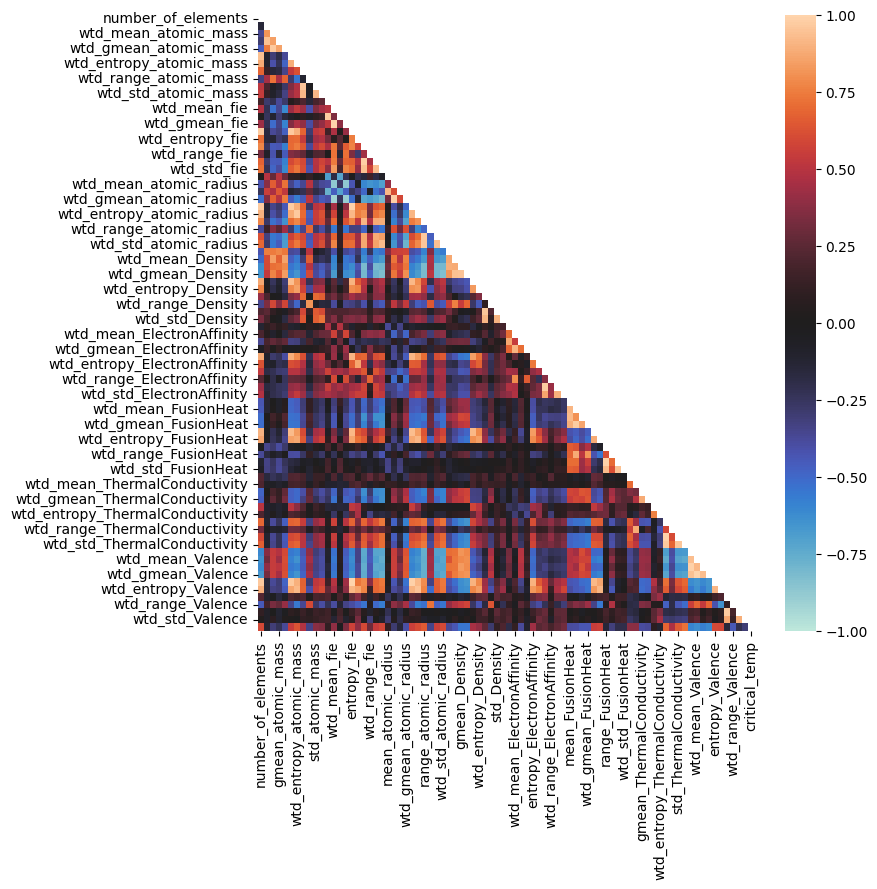

In [ ]:
pyplot.figure(figsize=(8,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

En este mapa de calor podemos observar a simple vista como múltiples variables están correlacionadas, entre ellas las que se nos especificaban en el enunciado.

<AxesSubplot:>

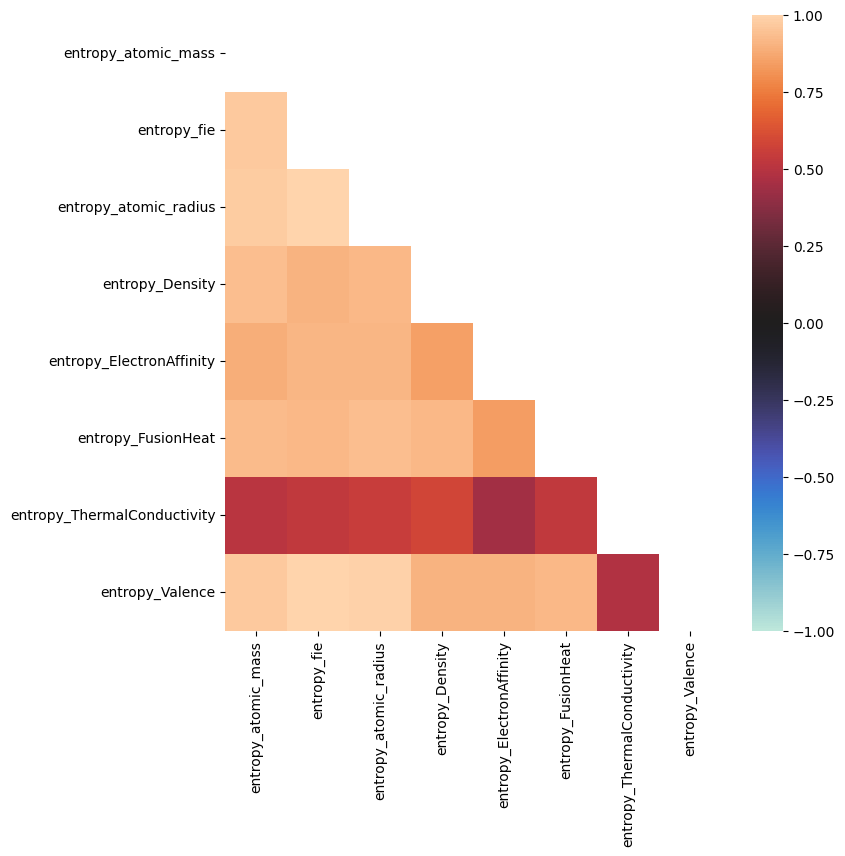

In [ ]:
variables = ['entropy_atomic_mass','entropy_fie','entropy_atomic_radius','entropy_Density','entropy_ElectronAffinity',
             'entropy_FusionHeat','entropy_ThermalConductivity','entropy_Valence']
df_redu = df[variables]

pyplot.figure(figsize=(8,8))

corr = df_redu.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='icefire')

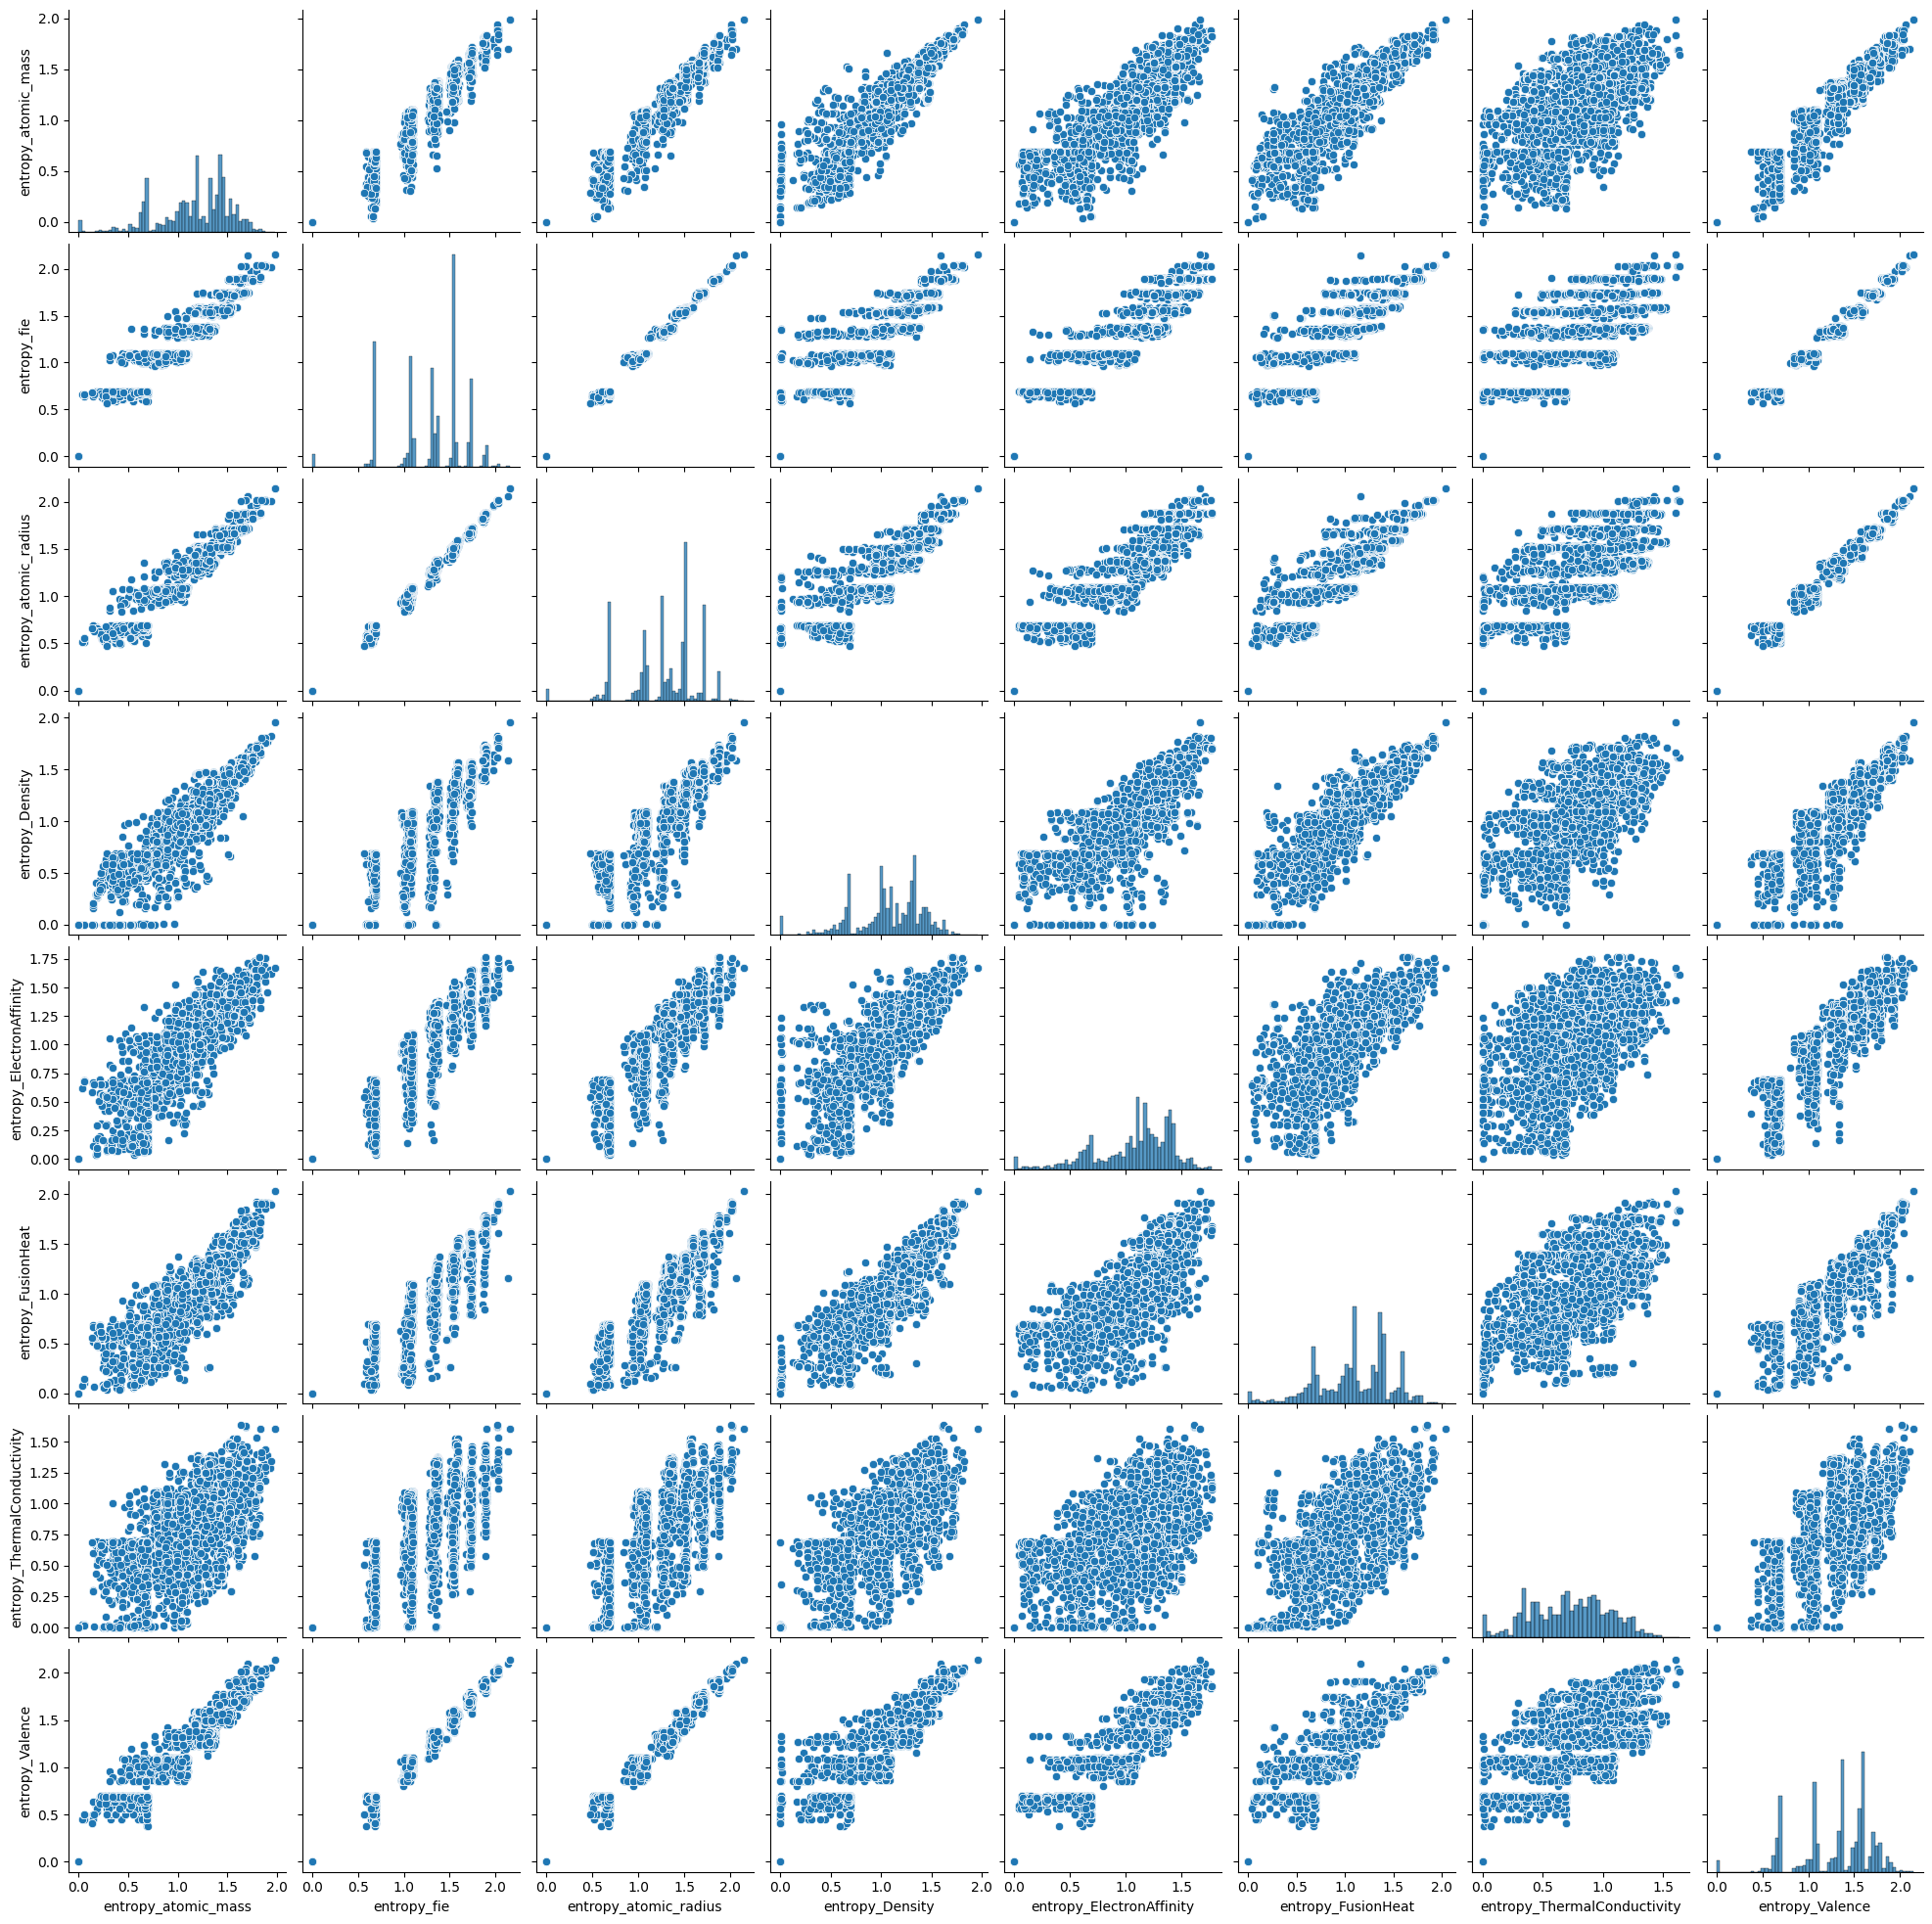

In [ ]:
sns.pairplot(df_redu)

En este pairplot vemos las tendencias y patrones que tienen estas variables entre ellas. En su gran mayoría todas presentan una tendencia similar a la función identidad.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                    df.iloc[:,-1:], train_size = 0.7, random_state = 0)
X_train.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
3158,3,55.722,45.791,44.661,34.552,0.931,1.025,71.621,13.905,29.758,...,2.00,2.000,2.000,2.000,1.099,1.040,0,0.500,0.000,0.000
18417,4,113.946,74.264,75.386,37.883,1.158,1.057,164.156,35.144,66.238,...,3.75,3.750,3.568,3.568,1.332,1.120,3,1.425,1.299,1.299
1178,4,76.445,46.546,59.357,31.481,1.200,1.309,121.328,12.383,43.823,...,2.25,2.067,2.213,2.055,1.369,1.124,1,1.000,0.433,0.249


Una vez hecho este análisis previo de nuestros datos procedemos a dividirlos en train y test con un tamaño del 70% y del 30% respectivamente

In [ ]:
scaler = StandardScaler()
SC_scaler = scaler.fit(X_train)
X_train_sc= SC_scaler.transform(X_train)
X_test_sc = SC_scaler.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns)
X_test_sc.shape

(6357, 81)

In [ ]:
scaler2 = StandardScaler()
SC_scaler2 = scaler2.fit(y_train)
y_test_sc = SC_scaler2.transform(y_test)

y_train_sc = pd.DataFrame(y_train_sc, columns = y_train.columns)
y_test_sc = pd.DataFrame(y_test_sc, columns = y_test.columns)
y_test_sc.shape

(6357, 1)

Antes de comenzar a construir nuestros modelos escalamos nuestros datos para que así sean más uniformes y nuestros modelos sean más precisos

##2. Modelos

##2.1 MLP Regressor

In [ ]:
MLP_Reg2 = Sequential()
MLP_Reg2.add(Dense(128, input_shape=(81,), activation='relu', kernel_regularizer = l1(0.01)))

MLP_Reg2.add(Dense(32, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg2.add(BatchNormalization())
MLP_Reg2.add(Dropout(0.2))
MLP_Reg2.add(Dense(16, activation='relu', kernel_regularizer = l1(0.01)))
MLP_Reg2.add(BatchNormalization())
MLP_Reg2.add(Dropout(0.2))

MLP_Reg2.add(Dense(1, activation='relu', kernel_regularizer = l1(0.01)))

learning_rate = 0.01

MLP_Reg2.compile(loss='MeanAbsoluteError', optimizer='Adam', metrics=['MeanAbsoluteError'])

history_Reg2 = MLP_Reg2.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, batch_size=70)

_, mae_tr = MLP_Reg2.evaluate(X_train_sc, y_train)
_, mae_ts = MLP_Reg2.evaluate(X_test_sc, y_test)

print('MSE train: %.2f' % (mae_tr))
print('MSE test: %.2f' % (mae_ts))

Epoch 1/100
212/212 [==============================] - 3s 10ms/step - loss: 38.5677 - mean_absolute_error: 30.6610 - val_loss: 34.2510 - val_mean_absolute_error: 31.3082
Epoch 2/100
212/212 [==============================] - 2s 8ms/step - loss: 26.6989 - mean_absolute_error: 25.3035 - val_loss: 30.6162 - val_mean_absolute_error: 29.8506
Epoch 3/100
212/212 [==============================] - 2s 8ms/step - loss: 20.4243 - mean_absolute_error: 19.7563 - val_loss: 25.0200 - val_mean_absolute_error: 24.4275
Epoch 4/100
212/212 [==============================] - 2s 8ms/step - loss: 16.1500 - mean_absolute_error: 15.4605 - val_loss: 15.5824 - val_mean_absolute_error: 14.8774
Epoch 5/100
212/212 [==============================] - 2s 8ms/step - loss: 14.0716 - mean_absolute_error: 13.3879 - val_loss: 12.7346 - val_mean_absolute_error: 12.0089
Epoch 6/100
212/212 [==============================] - 2s 8ms/step - loss: 13.0735 - mean_absolute_error: 12.3306 - val_loss: 12.1510 - val_mean_absolute_

Nuestro primer modelo es una MLP de regresión no demasiado compleja, de esta manera evitamos el overfitting. Con este mismo fin añadimos Dropout a nuestras capas.

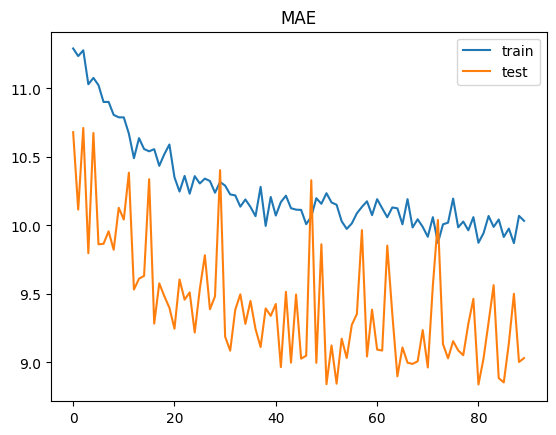

In [ ]:
pyplot.subplot()
pyplot.title('MAE')
pyplot.plot(history_Reg2.history['mean_absolute_error'][10:], label='train')
pyplot.plot(history_Reg2.history['val_mean_absolute_error'][10:], label='test')
pyplot.legend()

Obtenemos un MAE relativamente bajo pero con algo de overfitting, este modelo no es el más adecuado para tratar nuestros datos.

In [ ]:
X_predict1 = X_test_sc.copy()
X_predict1['MLP_Reg2'] = MLP_Reg2.predict(X_test_sc)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict1['MLP_Reg2']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict1['MLP_Reg2']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict1['MLP_Reg2'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict1['MLP_Reg2']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict1['MLP_Reg2']).round(4))

MAE:  9.0316
MSE:  214.9559
RMSE:  14.6614
MAPE:  4.1063
R2:  0.8185


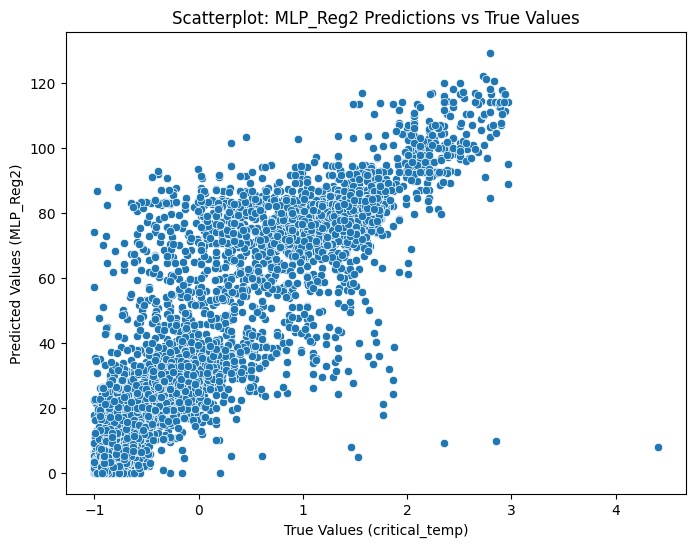

In [ ]:
test_plot = pd.DataFrame({'MLP_Reg2': X_predict1['MLP_Reg2'].squeeze(), 'critical_temp': y_test_sc.squeeze()})

pyplot.figure(figsize=(8, 6))
pyplot.title('Scatterplot: MLP_Reg2 Predictions vs True Values')
sns.scatterplot(data=test_plot, x='critical_temp', y='MLP_Reg2')
pyplot.xlabel('True Values (critical_temp)')
pyplot.ylabel('Predicted Values (MLP_Reg2)')
pyplot.show()

Podemos ver como esta MLP sigue una buena tendencia pero hay valores muy dispersos todavía.

##2.2 XG_Boost Regressor

In [ ]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import  XGBRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR

import warnings
warnings.filterwarnings("ignore")

Antes de entrenar nuestro modelo hacemos una GridSearchCV para encontrar los parámetros óptimos con los que hacerlo.

In [ ]:
XG_Reg = XGBRegressor()

grid = dict()
grid['n_estimators'] = [50,150,300]
grid['learning_rate'] = [0.1,0.01]
grid['max_depth'] = [5,10,15]

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=XG_Reg, param_grid=grid, cv=cv, scoring='neg_mean_absolute_error')

grid_result = grid_search.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -5.477050 using {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
-7.562239 (0.181396) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
-6.598801 (0.162939) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
-6.144189 (0.156430) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-5.644427 (0.170043) with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
-5.499741 (0.164060) with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
-5.477050 (0.160038) with: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
-5.548679 (0.177311) with: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 50}
-5.526321 (0.173958) with: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}
-5.535769 (0.173805) with: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}
-21.471686 (0.393218) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
-12.059780 (0.267277) with: {'learning_rate

Finalmente los mejores parámetros son 'learning_rate': 0.1, 'max_depth': 10 y 'n_estimators': 300. Procedemos a entrenar nuestro modelo con ellos.



In [ ]:
XG_Reg = XGBRegressor(learning_rate = 0.1, n_estimators = 300, max_depth = 10)
XG_Reg.fit(X_train_sc, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
X_predict2 = X_test_sc.copy()
X_predict2['XG_Reg'] = XG_Reg.predict(X_test_sc)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict2['XG_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict2['XG_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict2['XG_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict2['XG_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict2['XG_Reg']).round(4))

MAE:  5.4763
MSE:  103.2651
RMSE:  10.1619
MAPE:  2.7448
R2:  0.9128


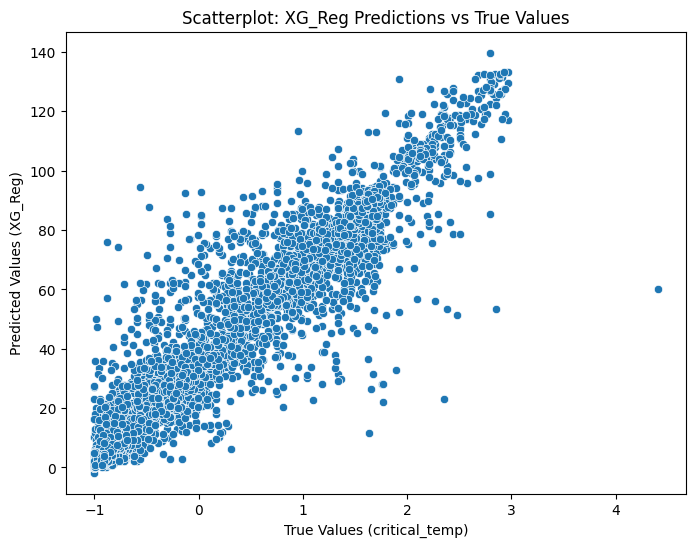

In [ ]:
test_plot = pd.DataFrame({'XG_Reg': X_predict2['XG_Reg'].squeeze(), 'critical_temp': y_test_sc.squeeze()})

pyplot.figure(figsize=(8, 6))
pyplot.title('Scatterplot: XG_Reg Predictions vs True Values')
sns.scatterplot(data=test_plot, x='critical_temp', y='XG_Reg')
pyplot.xlabel('True Values (critical_temp)')
pyplot.ylabel('Predicted Values (XG_Reg)')
pyplot.show()


Claramente vemos como nuestro XG_Boost hace un mejor trabajo que la MLP, mejorando la tendencia, y con un MAE, RMSE, MAPE y R2 mejores

##2.3 RandomForest Regressor

Al igual que antes procedemos primero con un GridSearchCV para saber que parámetros introducir.

In [ ]:
RF_Reg = RandomForestRegressor()

grid = dict()
grid['n_estimators'] = [50,100,150,200] # number of trees
grid['criterion'] = ['squared_error','friedman_mse']

cv = RepeatedKFold(n_splits = 5, random_state = 1)

grid_search = GridSearchCV(estimator = RF_Reg, param_grid = grid, cv = cv, scoring = 'neg_mean_absolute_error', verbose=3)

grid_result = grid_search.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 50 folds for each of 8 candidates, totalling 400 fits
[CV 1/50] END criterion=squared_error, n_estimators=50;, score=-5.597 total time=  15.5s
[CV 2/50] END criterion=squared_error, n_estimators=50;, score=-5.680 total time=  15.5s
[CV 3/50] END criterion=squared_error, n_estimators=50;, score=-5.632 total time=  15.5s
[CV 4/50] END criterion=squared_error, n_estimators=50;, score=-5.479 total time=  15.5s
[CV 5/50] END criterion=squared_error, n_estimators=50;, score=-5.527 total time=  15.5s
[CV 6/50] END criterion=squared_error, n_estimators=50;, score=-5.865 total time=  15.6s
[CV 7/50] END criterion=squared_error, n_estimators=50;, score=-5.475 total time=  15.3s
[CV 8/50] END criterion=squared_error, n_estimators=50;, score=-5.619 total time=  15.2s
[CV 9/50] END criterion=squared_error, n_estimators=50;, score=-5.597 total time=  15.5s
[CV 10/50] END criterion=squared_error, n_estimators=50;, score=-5.471 total time=  15.4s
[CV 11/50] END criterion=squared_error, n_estim

En este caso el mejor resultado ha sido con 'criterion': 'friedman_mse' y 'n_estimators': 200 , montemos con ellos el modelo.

In [ ]:
RF_Reg = RandomForestRegressor(criterion = 'friedman_mse', n_estimators = 200)
RF_Reg.fit(X_train_sc, y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=200)

In [ ]:
X_predict3 = X_test_sc.copy()
X_predict3['RF_Reg'] = RF_Reg.predict(X_test_sc)


In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict3['RF_Reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict3['RF_Reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict3['RF_Reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict3['RF_Reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict3['RF_Reg']).round(4))


MAE:  5.5497
MSE:  100.2111
RMSE:  10.0105
MAPE:  3.0564
R2:  0.9154


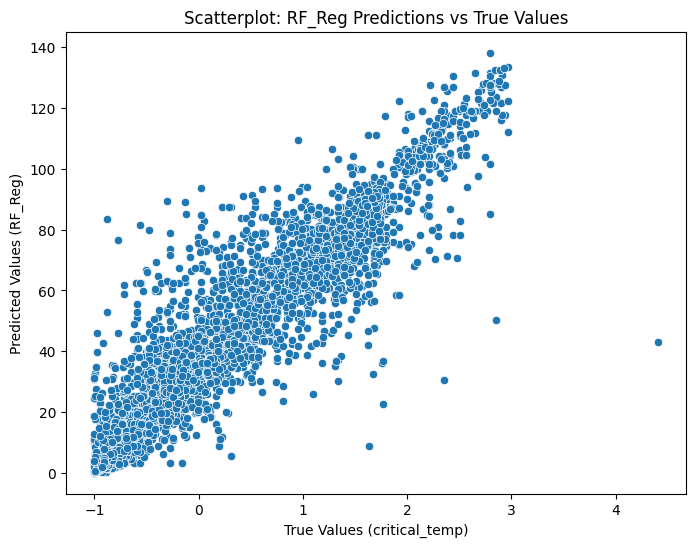

In [ ]:
test_plot = pd.DataFrame({'RF_Reg': X_predict3['RF_Reg'].squeeze(), 'critical_temp': y_test_sc.squeeze()})

pyplot.figure(figsize=(8, 6))
pyplot.title('Scatterplot: RF_Reg Predictions vs True Values')
sns.scatterplot(data=test_plot, x='critical_temp', y='RF_Reg')
pyplot.xlabel('True Values (critical_temp)')
pyplot.ylabel('Predicted Values (RF_Reg)')
pyplot.show()

Obtenemos unos valores muy parecidos a los del XG_Boost, por lo tanto bastante mejores que la MLP también.

##2.4 SVR

Nuevamente utilizamos GridSearchCV para conseguir los parámetros óptimos

In [ ]:
SVR_model = SVR()

grid = dict()
grid['C'] = [1,10]
grid['gamma']=[0.0001,0.01]
grid['kernel'] = ['rbf','poly']
grid['epsilon'] = [0.1,0.2,0.5]

cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

grid_search = GridSearchCV(estimator = SVR_model, param_grid = grid, cv = cv, scoring = 'neg_mean_absolute_error', verbose=3)

grid_result = grid_search.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 24 candidates, totalling 360 fits
[CV 1/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.214 total time=   9.4s
[CV 2/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.627 total time=   9.3s
[CV 3/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-18.982 total time=   9.7s
[CV 4/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.503 total time=   9.6s
[CV 5/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.032 total time=  10.3s
[CV 6/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.685 total time=   9.8s
[CV 7/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-18.913 total time=   9.5s
[CV 8/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-18.928 total time=   9.5s
[CV 9/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-19.847 total time=   9.6s
[CV 10/15] END C=1, epsilon=0.1, gamma=0.0001, kernel=rbf;, score=-18.982 total time=   9.7s
[CV 11/15] END C

Los alcanzamos con'C': 10, 'epsilon': 0.1, 'gamma': 0.01 y 'kernel': 'rbf', veamos ahora como entrena.

In [ ]:
SVR_model = SVR(kernel='rbf', C= 10, epsilon= 0.1, gamma= 0.01)
SVR_model.fit(X_train_sc, y_train)

SVR(C=10, gamma=0.01)

In [ ]:
X_predict4 = X_test_sc.copy()
X_predict4['SVR_model'] = SVR_model.predict(X_test_sc)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict4['SVR_model']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict4['SVR_model']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict4['SVR_model'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict4['SVR_model']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict4['SVR_model']).round(4))

MAE:  9.4641
MSE:  241.8436
RMSE:  15.5513
MAPE:  3.8509
R2:  0.7958


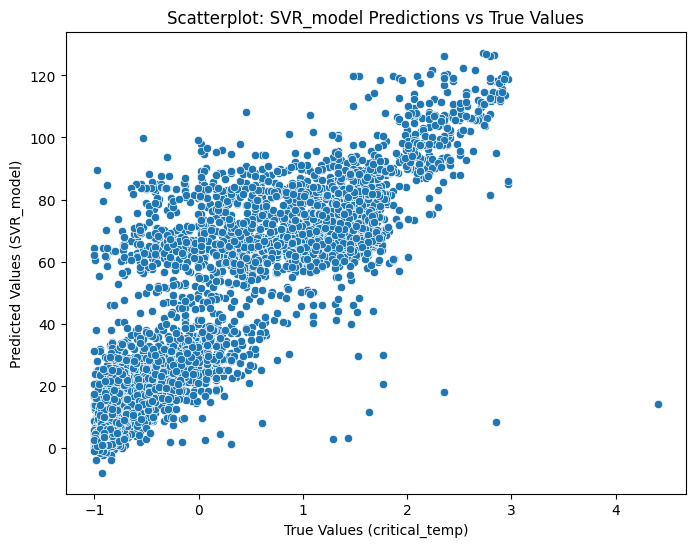

In [ ]:
test_plot = pd.DataFrame({'SVR_model': X_predict4['SVR_model'].squeeze(), 'critical_temp': y_test_sc.squeeze()})

# Crear scatterplot
pyplot.figure(figsize=(8, 6))
pyplot.title('Scatterplot: SVR_model Predictions vs True Values')
sns.scatterplot(data=test_plot, x='critical_temp', y='SVR_model')
pyplot.xlabel('True Values (critical_temp)')
pyplot.ylabel('Predicted Values (SVR_model)')
pyplot.show()

Este modelo funciona peor que nuestros XG_Boost y RandomForest e incluso algo peor que nuestra MLP en algunos parámetros por lo que no es recomendable.

##2.5 StackingRegressor

Una ventaja del Stacking Regressor es que no tenemos que buscar los parámetros óptimos con GridSearchCV por lo que ahorramos muchísimo tiempo de ejecución.

In [ ]:
level0 = list()
level0.append(('lr', LinearRegression()))
level0.append(('RF', RandomForestRegressor()))
level0.append(('svr', SVR()))

level1 = LinearRegression()

St_reg = StackingRegressor(estimators = level0, final_estimator = level1, verbose=3)

St_reg.fit(X_train_sc, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('RF', RandomForestRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression(), verbose=3)

In [ ]:
X_predict5 = X_test_sc.copy()
X_predict5['St_reg'] = St_reg.predict(X_test_sc)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, X_predict5['St_reg']).round(4))
print("MSE: ", metrics.mean_squared_error(y_test, X_predict5['St_reg']).round(4))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, X_predict5['St_reg'])).round(4))
print("MAPE: ", metrics.mean_absolute_percentage_error(y_test, X_predict5['St_reg']).round(4))
print("R2: ", metrics.r2_score(y_test, X_predict5['St_reg']).round(4))

MAE:  5.5564
MSE:  100.317
RMSE:  10.0158
MAPE:  3.0706
R2:  0.9153


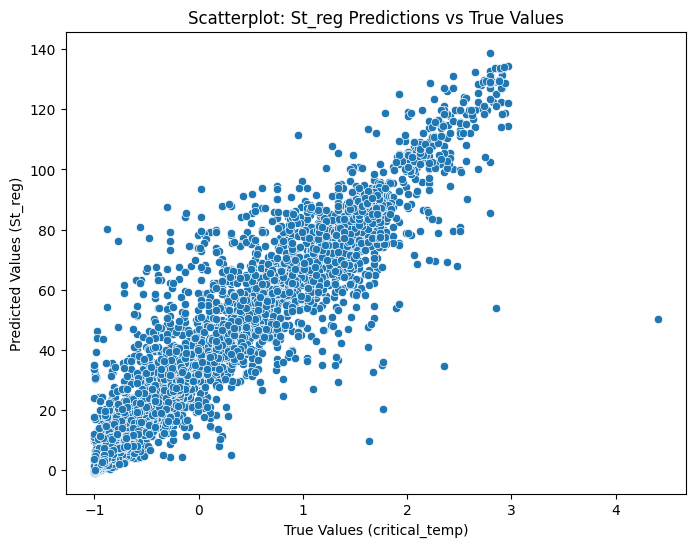

In [ ]:
test_plot = pd.DataFrame({'St_reg': X_predict5['St_reg'].squeeze(), 'critical_temp': y_test_sc.squeeze()})

pyplot.figure(figsize=(8, 6))
pyplot.title('Scatterplot: St_reg Predictions vs True Values')
sns.scatterplot(data=test_plot, x='critical_temp', y='St_reg')
pyplot.xlabel('True Values (critical_temp)')
pyplot.ylabel('Predicted Values (St_reg)')
pyplot.show()

Sorprendentemente el Stacking alcanza unos valores muy similares a los del XG_Boost y RandomForest tanto en métricas como en la tendencia que vemos en la gráfica, tardando mucho menos que estos en ejecutar.

In [ ]:
model_names = ['MLP_Reg2', 'XG_Reg', 'RF_Reg', 'SVR_model', 'St_reg']
mae_list, rmse_list, mape_list, r2_list = [], [], [], []

def calculate_metrics(model_name, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred).round(4)
    r2 = metrics.r2_score(y_test, y_pred).round(4)
    return mae, rmse, mape, r2

for model_name in model_names:
    y_pred = globals()[f'X_predict{model_names.index(model_name) + 1}'][model_name]

    mae, rmse, mape, r2 = calculate_metrics(model_name, y_test, y_pred)
    mae_list.append(mae)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r2_list.append(r2)

metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'MAPE': mape_list,
    'R2': r2_list
})

metrics_df

,Model,MAE,RMSE,MAPE,R2
0,MLP_Reg2,9.0316,14.6614,4.1063,0.8185
1,XG_Reg,5.4763,10.1619,2.7448,0.9128
2,RF_Reg,5.5497,10.0105,3.0564,0.9154
3,SVR_model,9.4641,15.5513,3.8509,0.7958
4,St_reg,5.5564,10.0158,3.0706,0.9153


Finalmente presentamos los resultados en este dataframe para poder ver el conjunto más fácilmente y sacar conclusiones.

##Conclusiones




*   El XG_Boost parece tener el mejor desempeño general, ya que tiene el menor MAE, RMSE y MAPE, junto con el R2 más alto. Esto sugiere que el modelo XG_Reg tiende a realizar predicciones más precisas y explicativas en comparación con los otros modelos.
*   Los modelos XG_Boost y RandomForest tienen valores bajos tanto en MAE como en RMSE, indicando que las predicciones de estos modelos tienden a desviarse menos de los valores reales.

*   El modelo XG_Boost también muestra el MAPE más bajo, lo que significa que tiene el menor error porcentual absoluto medio en las predicciones. Este modelo parece ser más preciso en términos relativos.

*   XG_Boost y RandomForest tienen valores de R2 significativamente más altos en comparación con los otros modelos, lo que indica que estos modelos explican mejor la variabilidad en los datos de 'critical_temp' . Estos modelos parecen ser más capaces de capturar las relaciones que hay entre los datos.

*   El Stacking y el RandomForest muestran resultados bastante similares en todas las métricas, sugiriendo una estabilidad y consistencia en el rendimiento entre ambos modelos.

*   La MLP y el SVR en cambio tienen valores de MAE y RMSE más altos en comparación con otros modelos, indicando que pueden ser más sensibles al ruido o variaciones en los datos.



De todas formas estas conclusiones estan sujetas a cambios, ya que si refinamos mucho más la búsqueda de los parámetros óptimos para nuestros modelos, es muy posible que tanto el XG_Boost como el RandomForest se distancien del Stacking y sean más eficaces aún.